 ## DATASET DE VACUNACION 
 This dataset has 264 patients and 8 different features or columns and from a visual inspection we can find that there are two long description columns, one refering to the health service and the second to the diagnostic. 

In [74]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

In [75]:
vaccination = pd.read_excel(f'./Data/Vacunacion.xlsx')
#dyspnea = pd.read_excel(f'./Data/Disnea.xlsx')
vaccination

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,845676,2018-01-29,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
1,686768,2018-05-20,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
2,1790062,2018-06-05,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
3,1142931,2018-01-10,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,1734917,2018-06-06,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
...,...,...,...,...,...,...,...,...
259,695889,2020-05-06,Medellin,S1120192,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
260,682268,2020-05-13,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
261,1932263,2020-05-11,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
262,1233344,2020-05-14,Medellin,S1120195,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1


In [76]:
vaccination.columns

Index(['Numero_de_documento', 'Fecha_Emision', 'Regional_EPS_Desc',
       'Codigo_Prestacion_Op', 'Descripcion_Prestacion',
       'Codigo_Diagnostico_EPS_Op', 'Diagnostico_EPS_Desc',
       'Cantidad_Autorizada'],
      dtype='object')

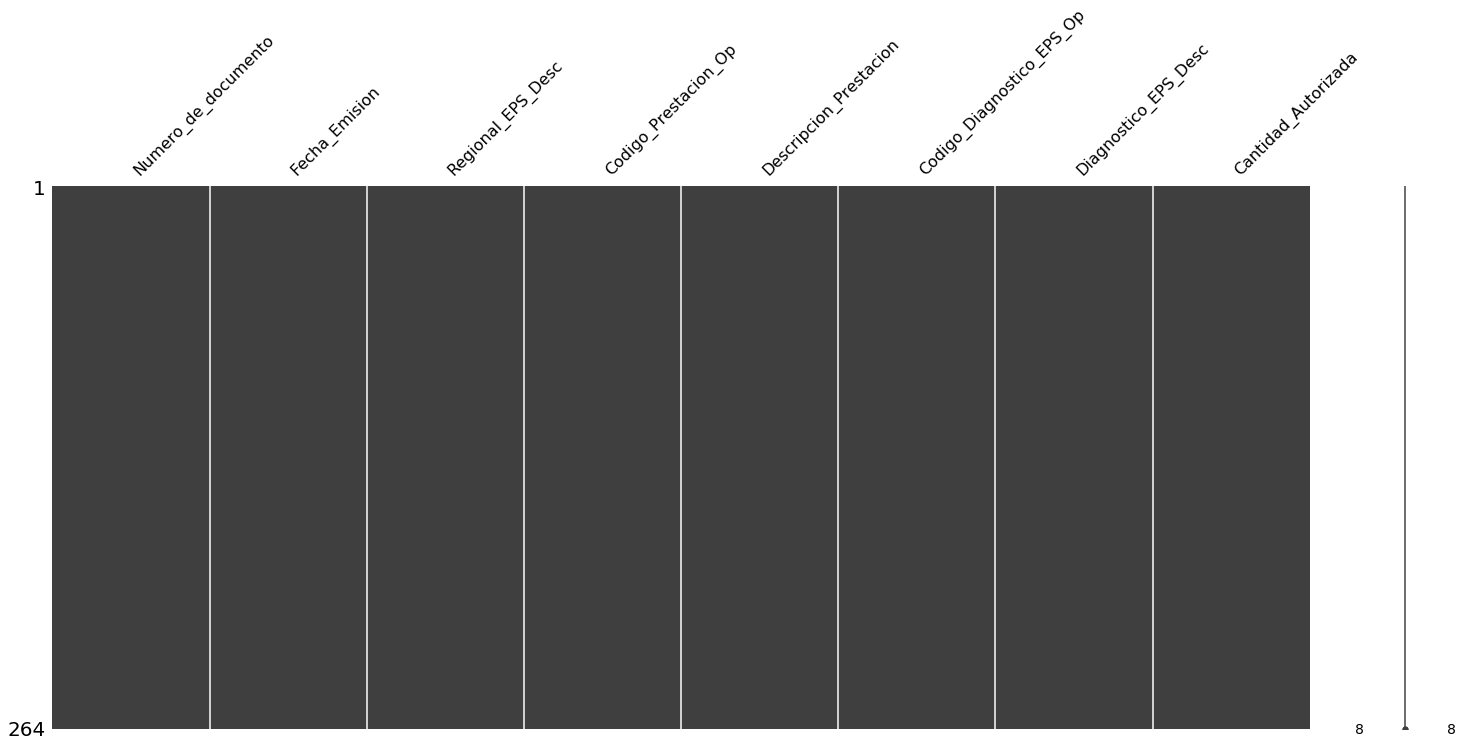

In [77]:
msno.matrix(msno.nullity_sort(vaccination, sort='descending'))

In [78]:
vaccination.describe()

,Numero_de_documento,Cantidad_Autorizada
count,2.640000e+02,264.0
mean,1.222966e+06,1.0
std,4.297377e+05,0.0
min,5.005470e+05,1.0
25%,8.442592e+05,1.0
50%,1.216245e+06,1.0
75%,1.640782e+06,1.0
max,1.985014e+06,1.0


### Re-naming columns

In [79]:
df_cp = vaccination.copy()
df_cp.rename(columns={
    'Numero_de_documento':'id_paciente',
    'Fecha_Emision':'Fecha_Emision',
    'Regional_EPS_Desc':'Regional_EPS_Desc',
    'Codigo_Prestacion_Op':'Codigo_Prestacion_Op',
    'Descripcion_Prestacion':'Descripcion_Prestacion',
    'Codigo_Diagnostico_EPS_Op':'Codigo_Diagnostico_EPS_Op',
    'Diagnostico_EPS_Desc':'Diagnostico_EPS_Desc',
    'Cantidad_Autorizada':'Cantidad_Autorizada'
},inplace = True)
df_cp.groupby('Descripcion_Prestacion').count()

,id_paciente,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
Descripcion_Prestacion,,,,,,,
"HEPATITIS A, ANTICUERPOS IG M [ANTI HVA-M]",1,1,1,1,1,1,1
"HEPATITIS A, ANTICUERPOS TOTALES [ANTI HVA]",1,1,1,1,1,1,1
"HEPATITIS B, ANTICUERPOS SUPERFICIE [ANTI-HBS]",15,15,15,15,15,15,15
VACUNA HEPATITIS B ADULTOS -INDICACIONES DIFERENTES A RESOLUCIÓN 6408-,1,1,1,1,1,1,1
VACUNA INFLUENZA PAI MUJERES GESTANTES A PARTIR SEMANA 14,1,1,1,1,1,1,1
VACUNA NEUMOCOCO 23 -USO EXCLUSIVO BOGOTA Y CALI- DOSIS UNICA,2,2,2,2,2,2,2
VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,242,242,242,242,242,242,242
VACUNA PAI INFLUENZA NIÑOS/ASHASTA LOS 23 MESES,1,1,1,1,1,1,1


So we can count the amount of people that is currently under this enterprise by selecting using the function `reset_index()loc` to determine the amount of people thatcan be found by city. Therefore from the table we just generated below we can see that most of the population corresponds to Medellin areea 

So sofar we have 264 records

In [80]:
df_cp['Descripcion_Prestacion'].replace("HEPATITIS B, ANTICUERPOS SUPERFICIE [ANTI-HBS]","ANTI-HBS",inplace=True)
df_cp['Descripcion_Prestacion'].replace("VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS","PAI_VACC",inplace=True)
print("Records data before filtering out unuseful data: {0}".format(df_cp.shape))
print("Patient data before filtering out unuseful data: {0}".format(df_cp.groupby('id_paciente').count().shape))

Records data before filtering out unuseful data: (264, 8)
Patient data before filtering out unuseful data: (161, 7)


In [81]:
ANTI_HBS = df_cp[df_cp['Descripcion_Prestacion'].str.contains('ANTI-HBS')]
PAI_VACC = df_cp[df_cp['Descripcion_Prestacion'].str.contains('PAI_VACC')]
frames =  [ PAI_VACC, ANTI_HBS]
result =  pd.concat(frames)
print("Records shape after filtering out data {0}".format(result.shape))
print("Patients shape after filtering out data {0}".format(result.groupby("id_paciente").count().shape))

Records shape after filtering out data (257, 8)
Patients shape after filtering out data (159, 7)


From this we have simplified 7 raws, which were not useful for our analysis since they are not significantly important.

Convert to categorical data

In [84]:
result['Descripcion_Prestacion'] = result['Descripcion_Prestacion'].astype("category")
result['Descripcion_Prestacion'].unique()

[PAI_VACC, ANTI-HBS]
Categories (2, object): [PAI_VACC, ANTI-HBS]

### Visualization 

Text(0, 0.5, 'Number of patients')

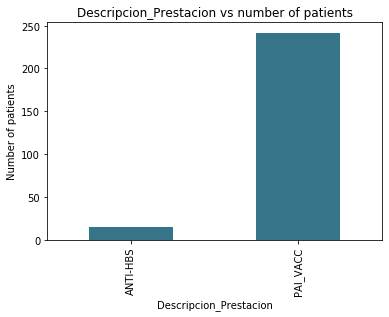

In [85]:
ax = result[["id_paciente", 'Descripcion_Prestacion']].groupby('Descripcion_Prestacion').size().plot(kind='bar', color='#367588')
ax.set_title("Descripcion_Prestacion vs number of patients")
ax.set_xlabel('Descripcion_Prestacion')
ax.set_ylabel('Number of patients')

In [86]:
result.groupby('Diagnostico_EPS_Desc').count()

,id_paciente,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Cantidad_Autorizada
Diagnostico_EPS_Desc,,,,,,,
"ARTRITIS REUMATOIDE, NO ESPECIFICADA",1,1,1,1,1,1,1
"ASMA, NO ESPECIFICADA",1,1,1,1,1,1,1
"DEGENERACIÓN GRASA DEL HÍGADO, NO CLASIFICADA EN OTRA PARTE",1,1,1,1,1,1,1
"ENTESOPATÍA DEL MIEMBRO INFERIOR, NO ESPECIFICADA",1,1,1,1,1,1,1
EXAMEN ESPECIAL NO ESPECIFICADO,2,2,2,2,2,2,2
FIBROMIALGIA,1,1,1,1,1,1,1
NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA [GRIPE],196,196,196,196,196,196,196
OTRAS CIRROSIS DEL HÍGADO Y LAS NO ESPECIFICADAS,2,2,2,2,2,2,2
OTRAS URTICARIAS,1,1,1,1,1,1,1


In [88]:
result['Diagnostico_EPS_Desc'].replace("NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA [GRIPE]","INM_GRIPE",inplace=True)
result['Diagnostico_EPS_Desc'].replace("PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVICIOS MÉDICOS Y DE SALUD","NON_RELATED",inplace=True)
INM_GRIPE = result[result['Diagnostico_EPS_Desc'].str.contains('INM_GRIPE')]
NON_RELATED = result[result['Diagnostico_EPS_Desc'].str.contains('NON_RELATED')]
frame_2 =  [ INM_GRIPE, NON_RELATED]
result_2 =  pd.concat(frame_2)
print("Records data before filtering out unuseful data: {0}".format(result_2.shape))
print("Patient data before filtering out unuseful data: {0}".format(result_2.groupby('id_paciente').count().shape))

Records data before filtering out unuseful data: (245, 8)
Patient data before filtering out unuseful data: (155, 7)


### Convert to categorical data

In [89]:
result_2['Diagnostico_EPS_Desc'] = result_2['Diagnostico_EPS_Desc'].astype("category")
result_2['Diagnostico_EPS_Desc'].unique()

[INM_GRIPE, NON_RELATED]
Categories (2, object): [INM_GRIPE, NON_RELATED]

### Visualization

Text(0, 0.5, 'Number of patients')

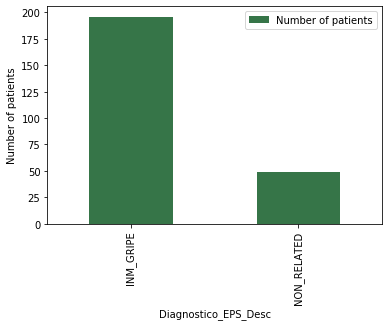

In [90]:
ax = result_2[["id_paciente", 'Diagnostico_EPS_Desc']].groupby('Diagnostico_EPS_Desc').size().plot(kind='bar', color='#367548')
ax.legend(['Number of patients'])
ax.set_xlabel('Diagnostico_EPS_Desc')
ax.set_ylabel('Number of patients')

In [91]:
result_2[['Fecha_Emision']].describe()

,Fecha_Emision
count,245
unique,157
top,2019-06-05 00:00:00
freq,6
first,2018-01-03 00:00:00
last,2020-05-14 00:00:00


From this data we can see that most of the measurements have been performed between 2018 and 2020

In [92]:
loc = result_2[['id_paciente','Regional_EPS_Desc']].groupby('Regional_EPS_Desc').count().reset_index()
loc

,Regional_EPS_Desc,id_paciente
0,Barranquilla,7
1,Bogota,12
2,Cali,12
3,Manizales,4
4,Medellin,208
5,Pereira,2


In [93]:
result_2.groupby(['id_paciente'],as_index=False).count()

,id_paciente,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,500547,2,2,2,2,2,2,2
1,537607,1,1,1,1,1,1,1
2,539998,1,1,1,1,1,1,1
3,540250,2,2,2,2,2,2,2
4,541007,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
150,1932263,3,3,3,3,3,3,3
151,1940079,2,2,2,2,2,2,2
152,1971217,1,1,1,1,1,1,1
153,1973217,1,1,1,1,1,1,1


By grouping the dataset by identification numbers, we have identified that there are 161 patients and therefore there are 103 repetitions


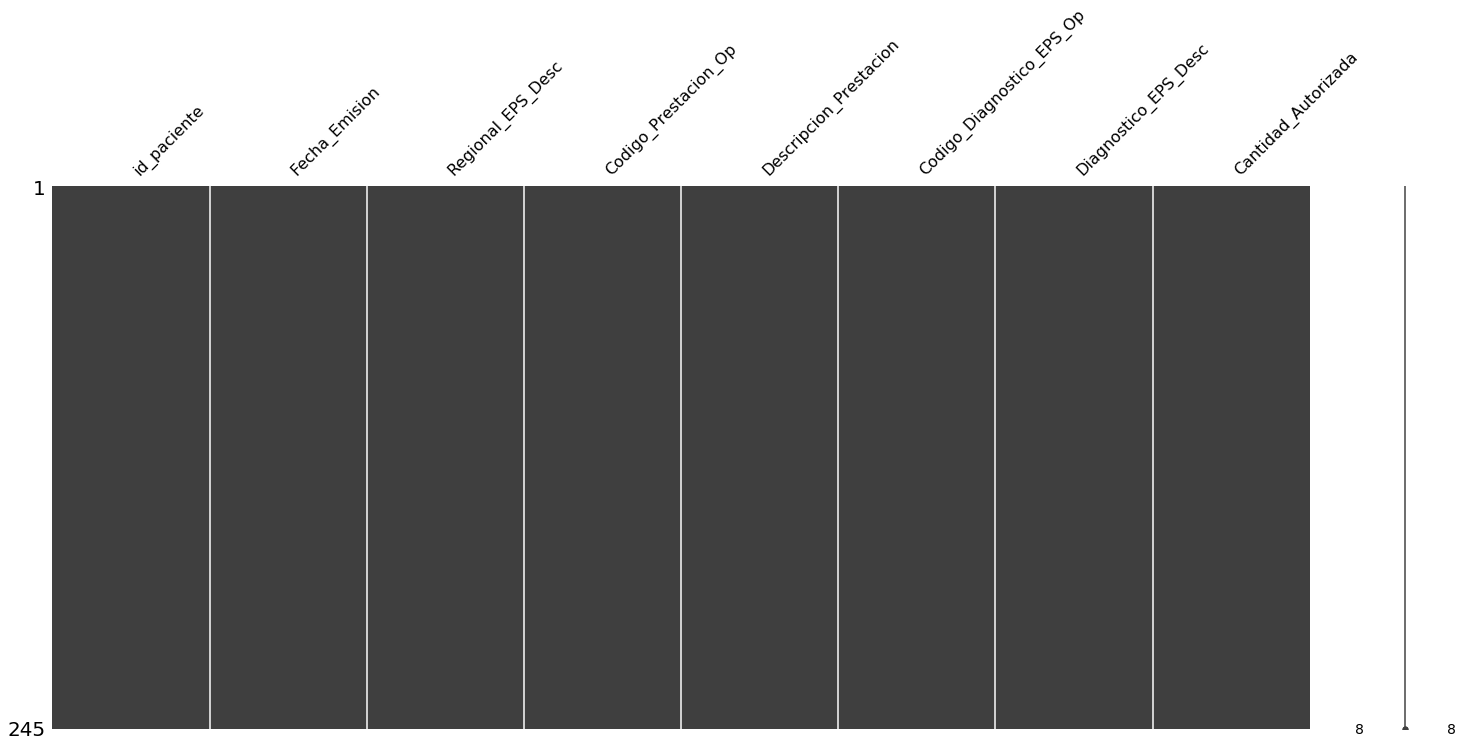

In [94]:
msno.matrix(msno.nullity_sort(result_2, sort='descending'))
# This dataset seems to be complete

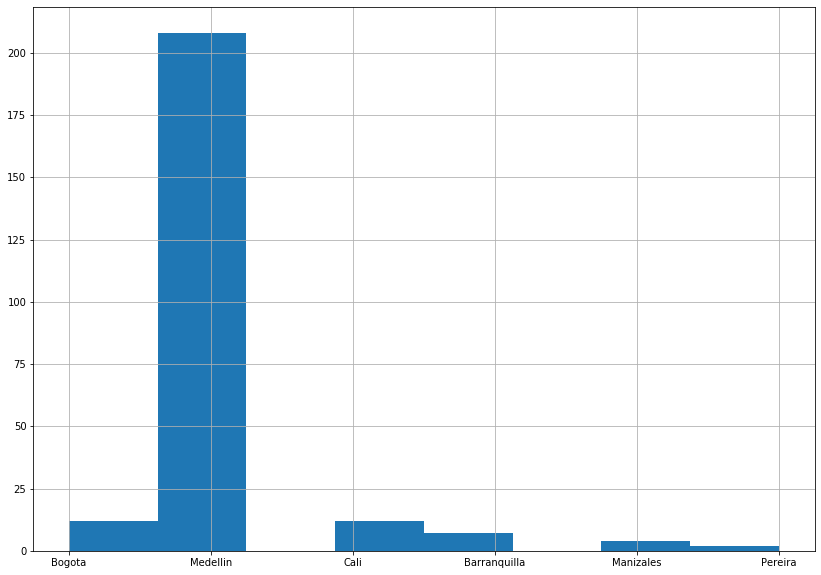

In [95]:
fig, ax = plt.subplots(figsize=(14,10))
result_2['Regional_EPS_Desc'].hist(bins=8)

In [96]:
result_2.groupby(['Descripcion_Prestacion'],as_index=False).count().head(20)

,Descripcion_Prestacion,id_paciente,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,ANTI-HBS,3,3,3,3,3,3,3
1,PAI_VACC,242,242,242,242,242,242,242


In [97]:
result_2.isnull().any()

id_paciente                  False
Fecha_Emision                False
Regional_EPS_Desc            False
Codigo_Prestacion_Op         False
Descripcion_Prestacion       False
Codigo_Diagnostico_EPS_Op    False
Diagnostico_EPS_Desc         False
Cantidad_Autorizada          False
dtype: bool

In [98]:
result_2.to_csv('./data/cleansed/vacunacion.csv', sep='|')